In [1]:
##importing packages
import glob
import os
import librosa
import librosa.display
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import IPython.display as ipd
%matplotlib inline

In [2]:
#forming a panda dataframe from the metadata file
data=pd.read_csv("UrbanSound8K.csv")
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [3]:
#count of datapoints in each of the folders
data["fold"].value_counts(sort= True)

4     990
5     936
3     925
2     888
1     873
7     838
10    837
6     823
9     816
8     806
Name: fold, dtype: int64

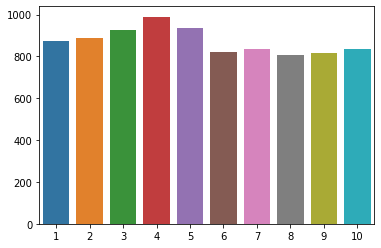

In [4]:
# Classes=['jackhammer','engine_idling','siren','children_playing','drilling','street_music','air_conditioner','dog_bark','car_horn','gun_shot']
# 0 = air_conditioner 1 = car_horn 2 = children_playing 3 = dog_bark 4 = drilling 5 = engine_idling 6 = gun_shot 7 = jackhammer 8 = siren 9 = street_music

counts = data["fold"].value_counts(sort=True)
sns.barplot(x = counts.index, y = counts.values)


We can see that every fold has similar counts of sound files.

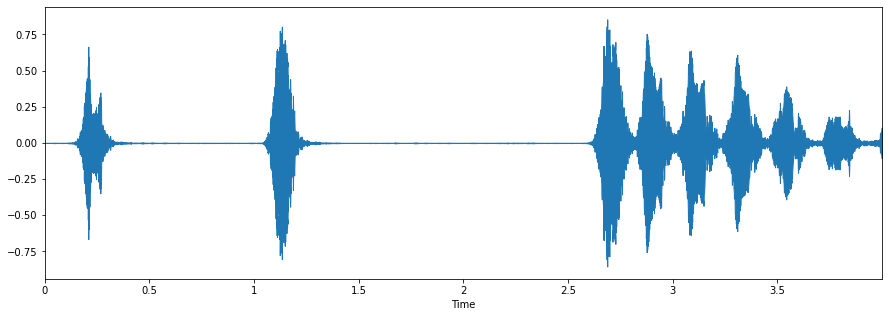

In [5]:
# Use one audio file in previous parts again
fname = 'fold1/101415-3-0-2.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Paly it again to refresh our memory
ipd.Audio(data, rate=sampling_rate)

In [6]:
def load_sound_files(file_paths):
    raw_sounds = []
    for fp in file_paths:
        X,sr = librosa.load(fp)
        raw_sounds.append(X)
    return raw_sounds
    
def plot_waves(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(25,60), dpi = 900)
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(10,1,i)
        librosa.display.waveplot(np.array(f),sr=22050)
        plt.title(n.title())
        i += 1
    plt.suptitle("Figure 1: Waveplot",x=0.5, y=0.915,fontsize=18)
    plt.show()

def plot_specgram(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(25,60), dpi = 900)
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(10,1,i)
        specgram(np.array(f), Fs=22050)
        plt.title(n.title())
        i += 1
    plt.suptitle("Figure 2: Spectrogram",x=0.5, y=0.915,fontsize=18)
    plt.show()

def plot_log_power_specgram(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(25,60), dpi = 900)
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(10,1,i)
        D = librosa.logamplitude(np.abs(librosa.stft(f))**2, ref_power=np.max)
        librosa.display.specshow(D,x_axis='time' ,y_axis='log')
        plt.title(n.title())
        i += 1
    plt.suptitle("Figure 3: Log power spectrogram",x=0.5, y=0.915,fontsize=18)
    plt.show()

In [1]:
sound_file_paths = ["fold5/100852-0-0-0.wav","fold5/77509-1-0-0.wav","fold5/80806-2-0-0.wav","fold5/77233-3-0-67.wav",
"fold5/77774-4-0-3.wav","fold5/89724-5-0-1.wav","fold5/84254-6-0-0.wav",
"fold5/90013-7-0-0.wav","fold5/28426-8-0-0.wav","fold5/36263-9-0-12.wav"]

sound_names = ["air conditioner","car horn","children playing",
"dog bark","drilling","engine idling", "gun shot",
"jackhammer","siren","street music"]

raw_sounds = load_sound_files(sound_file_paths)

plot_waves(sound_names,raw_sounds)
plot_specgram(sound_names,raw_sounds)
plot_log_power_specgram(sound_names,raw_sounds)

NameError: name 'load_sound_files' is not defined

In [4]:
#feature set
#This file is of a dog bark
y,sr=librosa.load("fold5/100032-3-0-0.wav")
mfccs = librosa.feature.mfcc(y, sr, n_mfcc=40)
melspectrogram =librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40,fmax=8000)
chroma_stft=librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=40)
chroma_cq =librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=40)
chroma_cens =librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=40)
melspectrogram.shape,chroma_stft.shape,chroma_cq.shape,chroma_cens.shape,mfccs.shape

((40, 14), (40, 14), (40, 14), (40, 14), (40, 14))

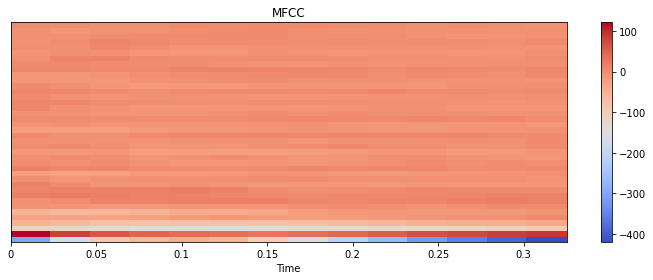

In [5]:
plt.figure(figsize=(10,4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

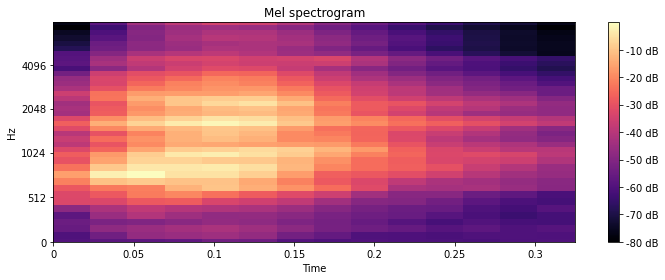

In [6]:
#Melspectrogram of a dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.power_to_db(melspectrogram,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

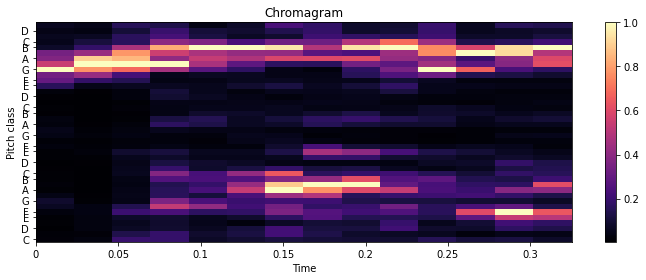

In [7]:
#Chromagram of dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

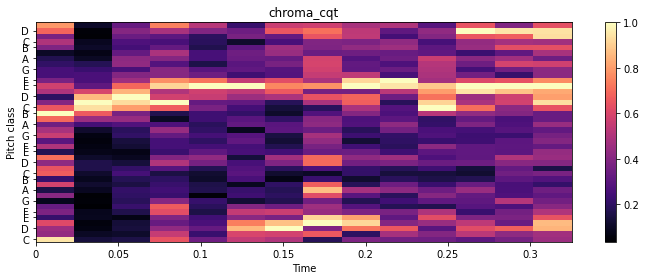

In [8]:
#Chroma cqt of a dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('chroma_cqt')
plt.tight_layout()

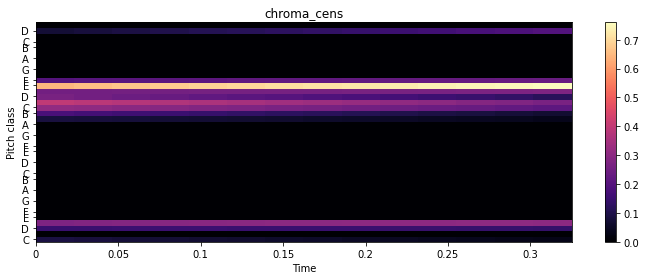

In [9]:
#Chroma cens of a dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_cens, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('chroma_cens')
plt.tight_layout()

In [11]:
#feature set
y,sr=librosa.load("fold5/100263-2-0-137.wav")
mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=40).T,axis=0)
melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40,fmax=8000).T,axis=0)
chroma_stft=np.mean(librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=40).T,axis=0)
chroma_cq = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=40).T,axis=0)
chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=40).T,axis=0)
melspectrogram.shape,chroma_stft.shape,chroma_cq.shape,chroma_cens.shape,mfccs.shape

((40,), (40,), (40,), (40,), (40,))

In [12]:
#stacking and reshaping
features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft,chroma_cq,chroma_cens)),(40,5))
features.shape

(40, 5)

In [14]:
#preprocessing using only mfcc
x_train_mfcc =[]
x_test_mfcc =[]
y_train_mfcc =[]
y_test_mfcc =[]
path="fold"
for i in range(len(data)):
    fold_no=str(data.iloc[i]["fold"])
    file=data.iloc[i]["slice_file_name"]
    label=data.iloc[i]["classID"]
    filename=path+fold_no+"/"+file
    #print(filename)
    y,sr=librosa.load(filename)
    mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=40).T,axis=0)
    #print(mfccs.shape,mfccs.max(),mfccs.min())
    if(fold_no!='10'):
      x_train_mfcc.append(mfccs)
      y_train_mfcc.append(label)
    else:
      x_test_mfcc.append(mfccs)
      y_test_mfcc.append(label)

In [15]:
#saving the data numpy arrays
np.savetxt("train_data_mfcc.csv", x_train_mfcc, delimiter=",")
np.savetxt("test_data_mfcc.csv",x_test_mfcc,delimiter=",")
np.savetxt("train_labels_mfcc.csv",y_train_mfcc,delimiter=",")
np.savetxt("test_labels_mfcc.csv",y_test_mfcc,delimiter=",")

In [46]:
#preprocessing using entire feature set
# import time
# X_all = []
# Y_all = []
# path="fold"
# start = time.time()
# for i in range(len(data)):
#     fold_no=str(data.iloc[i]["fold"])
#     file=data.iloc[i]["slice_file_name"]
#     label=data.iloc[i]["classID"]
#     filename=path+fold_no+"/"+file
#     y,sr=librosa.load(filename)
#     mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=40).T,axis=0)
#     melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40,fmax=8000).T,axis=0)
#     chroma_stft=np.mean(librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=40).T,axis=0)
#     chroma_cq = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=40).T,axis=0)
#     chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=40).T,axis=0)
#     features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft,chroma_cq,chroma_cens)),(40,5))
#     X_all.append(features)
#     Y_all.append(label)
# end = time.time()

# print(end-start)

2973.7474908828735


In [64]:
# XX =[]
# for i in range(len(X_all)):
#     XX.append(np.ravel(X_all[i]))

In [72]:
# #saving the data numpy arrays
# np.savetxt("X_all.csv", XX, delimiter=",")
# np.savetxt("Y_all.csv",Y_all,delimiter=",")

In [76]:
x_train = pd.read_csv('X_all.csv', header = None)

In [77]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-209.935776,63.422630,-123.690247,-60.019207,-14.457383,-29.090641,-4.251178,12.419749,12.739302,9.053965,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.132581,0.000000
1,-417.291046,100.148506,-43.869251,51.953114,9.044406,8.780206,10.375921,2.731388,6.175258,5.065143,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,-452.774567,113.243027,-38.501553,44.062805,7.760896,16.246235,16.062386,2.090138,6.015343,4.747480,...,0.000000,0.0,0.000000,0.000000,0.059762,0.000000,0.000000,0.000000,0.000000,0.000000
3,-406.865417,92.069923,-25.974569,43.714275,10.644525,5.920062,11.480075,-0.713137,5.773804,2.349853,...,0.010958,0.0,0.048674,0.040018,0.022145,0.044255,0.000000,0.029533,0.110595,0.067826
4,-440.051483,104.752800,-43.601677,51.623081,11.323635,16.809435,10.851116,2.385327,10.400183,3.419037,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.008933,0.000000,0.000000,0.000000


In [82]:
def CNN_model(X_train, Y_train, X_test, Y_test, k):
    X_train = X_train.reshape(len(X_train), 8, 5, 1)
    X_test = X_test.reshape(len(X_test), 8, 5, 1)
    input_dim = (8, 5, 1)

    dropout_rate = 0.5

    model = Sequential()
    model.add(Conv2D(64, (3, 3), padding = "same", input_shape = input_dim))
    # model.add(BatchNormalization())
    model.add(Activation("tanh"))
    model.add(MaxPool2D())
    model.add(Dropout(dropout_rate))
    model.add(Conv2D(64, (3, 3), padding = "same"))
    # model.add(BatchNormalization())
    model.add(Activation("tanh"))
    model.add(MaxPool2D())
    model.add(Dropout(dropout_rate))
    model.add(Flatten())
    model.add(Dense(128))
    # model.add(BatchNormalization())
    model.add(Activation("tanh"))
    model.add(Dropout(dropout_rate))
    model.add(Dense(10))
    model.add(Activation("softmax"))

    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    model.fit(X_train, Y_train, epochs = 50, batch_size = 100, validation_data = (X_test, Y_test))

    print(model.summary())
    predictions = model.predict(X_test)
    score = model.evaluate(X_test, Y_test)
    print(score)


    preds = np.argmax(predictions, axis = 1)
    result = pd.DataFrame(preds)
    result.to_csv("UrbanSound8kResults" + str(k) + ".csv")
    return score[1]


def audio_norm(data):
    max_data = np.max(data)
    min_data = np.min(data)
    data = (data-min_data)/(max_data-min_data+1e-6)
    return data

In [80]:
# audio_norm(x_train)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.611737,0.405570,0.161011,0.107071,0.539636,0.233123,0.491097,0.604618,0.707278,0.644439,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.138324,0.000000
1,0.381660,0.511428,0.466129,0.716841,0.695542,0.520270,0.617697,0.495507,0.633640,0.610181,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.342288,0.549171,0.486647,0.673873,0.687028,0.576880,0.666914,0.488285,0.631846,0.607453,...,0.000000,0.000000,0.000000,0.000000,0.063386,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.393228,0.488143,0.534531,0.671975,0.706157,0.498584,0.627253,0.456715,0.629136,0.586860,...,0.011811,0.000000,0.049472,0.041923,0.023488,0.046034,0.000000,0.030574,0.115386,0.070008
4,0.356406,0.524699,0.467151,0.715044,0.710662,0.581150,0.621810,0.491610,0.681037,0.596043,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009482,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8727,0.410034,0.586662,0.475062,0.579956,0.641150,0.502584,0.666114,0.563162,0.593987,0.534968,...,0.198962,0.000000,0.000000,0.000000,0.000000,0.000000,0.034615,0.103633,0.045028,0.000000
8728,0.468042,0.445362,0.495677,0.667237,0.477818,0.356787,0.762289,0.369968,0.492172,0.685169,...,0.519017,0.336801,0.115941,0.000000,0.000000,0.000000,0.008848,0.017314,0.000000,0.000000
8729,0.514305,0.519513,0.489978,0.584726,0.628048,0.490096,0.616763,0.495895,0.563095,0.558455,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032672,0.000000
8730,0.470517,0.557669,0.458952,0.574770,0.564033,0.443945,0.716717,0.476898,0.553389,0.661505,...,0.036744,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.054351,0.173152,0.163312


In [88]:
def CV_model():
    X = pd.read_csv('X_all.csv', header = None)
    X = np.array(audio_norm(X))
    Y = pd.read_csv('Y_all.csv', header = None)
    Y = np.array(Y)

    folder = pd.read_csv("UrbanSound8K.csv")["fold"]
    folder = np.array(folder)
    acc = 0
    for k in range(1, 11):  # 10-fold
        print(k, "=============================================")
        idx = np.argwhere(folder!=k).reshape(-1)
        X_train = X[idx]
        Y_train = Y[idx]
        idx = np.argwhere(folder==k).reshape(-1)
        X_test = X[idx]
        Y_test = Y[idx]

        acc += CNN_model(X_train[:,0:40], Y_train, X_test[:,0:40], Y_test, k)
    acc /= k
    print("Avg Accuracy:", acc)

In [89]:
CV_model()

1 =============================================


ValueError: cannot reshape array of size 314360 into shape (7859,5,4,1)

In [24]:
t = pd.read_csv('results/test_data_mfcc.csv', header = None)

In [40]:
t = np.array(t)

In [44]:
idx = np.array([1,2,36,9])
t[idx][:, 10:20].shape

(4, 10)